I'm using the weather API that the professor provided us. https://open-meteo.com/
I would like to know the weather forecast for New York, especially the maximum and minimum temperatures for each date and precipitation.

In [ ]:
import requests
from datetime import datetime

# Define the API URL and parameters
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 40.7128,       #  latitude of New York City
    "longitude": -74.0060,     #  longitude of New York City
    "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum",  # Request daily data
    "timezone": "America/New_York"
}

# Send GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    weather_data = response.json()
    print("API response structure:", weather_data)  # Print the data structure for verification

    # Extract daily data if available
    if 'daily' in weather_data:
        dates = weather_data['daily']['time']
        max_temps = weather_data['daily']['temperature_2m_max']
        min_temps = weather_data['daily']['temperature_2m_min']
        precipitations = weather_data['daily']['precipitation_sum']

        # Display the extracted data
        print("\nDates:", dates)
        print("Max Temperatures:", max_temps)
        print("Min Temperatures:", min_temps)
        print("Precipitation:", precipitations)
    else:
        print("The 'daily' key is missing in the response.")
else:
    print("Error:", response.status_code)


API response structure: {'latitude': 40.710335, 'longitude': -73.99309, 'generationtime_ms': 0.08094310760498047, 'utc_offset_seconds': -18000, 'timezone': 'America/New_York', 'timezone_abbreviation': 'EST', 'elevation': 32.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'precipitation_sum': 'mm'}, 'daily': {'time': ['2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-16', '2024-11-17'], 'temperature_2m_max': [20.4, 11.6, 9.9, 9.1, 14.4, 12.5, 13.8], 'temperature_2m_min': [11.0, 1.3, -3.5, 6.0, 7.1, 6.8, 7.7], 'precipitation_sum': [1.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}}

Dates: ['2024-11-11', '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-16', '2024-11-17']
Max Temperatures: [20.4, 11.6, 9.9, 9.1, 14.4, 12.5, 13.8]
Min Temperatures: [11.0, 1.3, -3.5, 6.0, 7.1, 6.8, 7.7]
Precipitation: [1.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Making the visualization materials, using the matplotlib we learned.

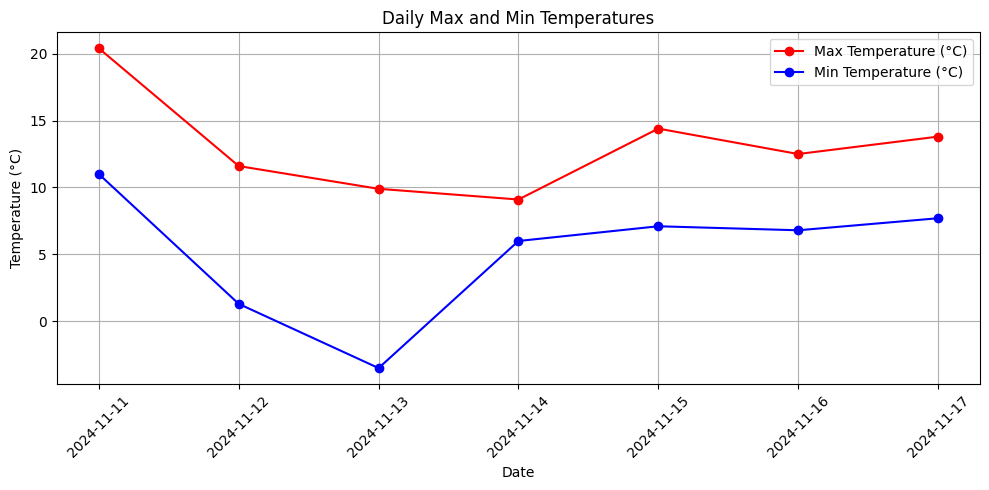

In [ ]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt

# Define the API URL and parameters
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 40.7128,       # Example latitude (e.g., New York City)
    "longitude": -74.0060,     # Example longitude (e.g., New York City)
    "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum",  # Request daily data
    "timezone": "America/New_York"
}

# Send GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    weather_data = response.json()

    # Extract daily data if available
    if 'daily' in weather_data:
        dates = weather_data['daily']['time']
        max_temps = weather_data['daily']['temperature_2m_max']
        min_temps = weather_data['daily']['temperature_2m_min']
        precipitations = weather_data['daily']['precipitation_sum']

        # Convert dates to a readable format for plotting
        dates = [datetime.strptime(date, "%Y-%m-%d").date() for date in dates]

        # Plot Maximum and Minimum Temperatures
        plt.figure(figsize=(10, 5))
        plt.plot(dates, max_temps, label="Max Temperature (°C)", color="red", marker="o")
        plt.plot(dates, min_temps, label="Min Temperature (°C)", color="blue", marker="o")
        plt.xlabel("Date")
        plt.ylabel("Temperature (°C)")
        plt.title("Daily Max and Min Temperatures")
        plt.legend()
        plt.grid()
        plt.xticks(rotation=45)  # Rotate date labels for better readability
        plt.tight_layout()       # Adjust layout
        plt.show()

    else:
        print("The 'daily' key is missing in the response.")
else:
    print("Error:", response.status_code)


Lastly, the precipitation graph.

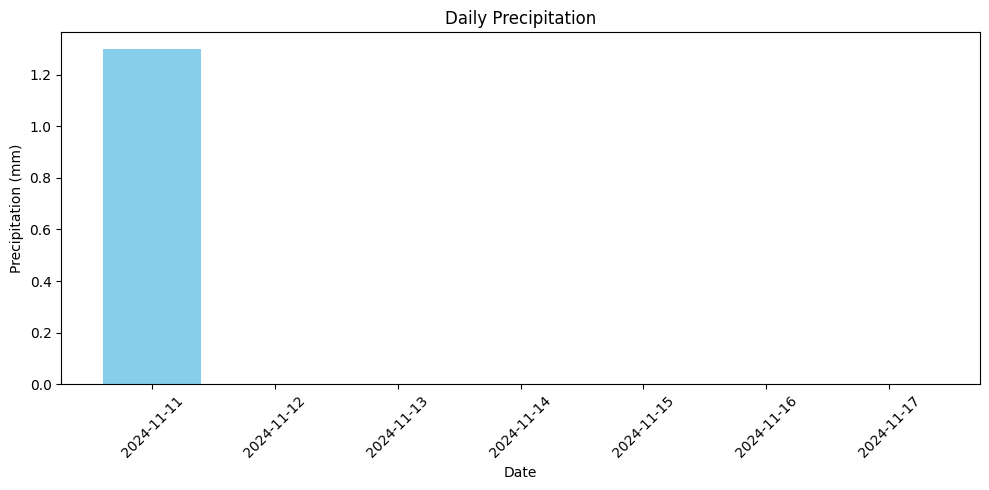

In [ ]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt

# Define the API URL and parameters
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 40.7128,       # Example latitude (e.g., New York City)
    "longitude": -74.0060,     # Example longitude (e.g., New York City)
    "daily": "temperature_2m_max,temperature_2m_min,precipitation_sum",  # Request daily data
    "timezone": "America/New_York"
}

# Send GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    weather_data = response.json()

    # Extract daily data if available
    if 'daily' in weather_data:
        dates = weather_data['daily']['time']
        max_temps = weather_data['daily']['temperature_2m_max']
        min_temps = weather_data['daily']['temperature_2m_min']
        precipitations = weather_data['daily']['precipitation_sum']

        # Convert dates to a readable format for plotting
        dates = [datetime.strptime(date, "%Y-%m-%d").date() for date in dates]

        # Plot Precipitation
        plt.figure(figsize=(10, 5))
        plt.bar(dates, precipitations, color="skyblue")
        plt.xlabel("Date")
        plt.ylabel("Precipitation (mm)")
        plt.title("Daily Precipitation")
        plt.xticks(rotation=45)  # Rotate date labels for better readability
        plt.tight_layout()       # Adjust layout
        plt.show()
    else:
        print("The 'daily' key is missing in the response.")
else:
    print("Error:", response.status_code)